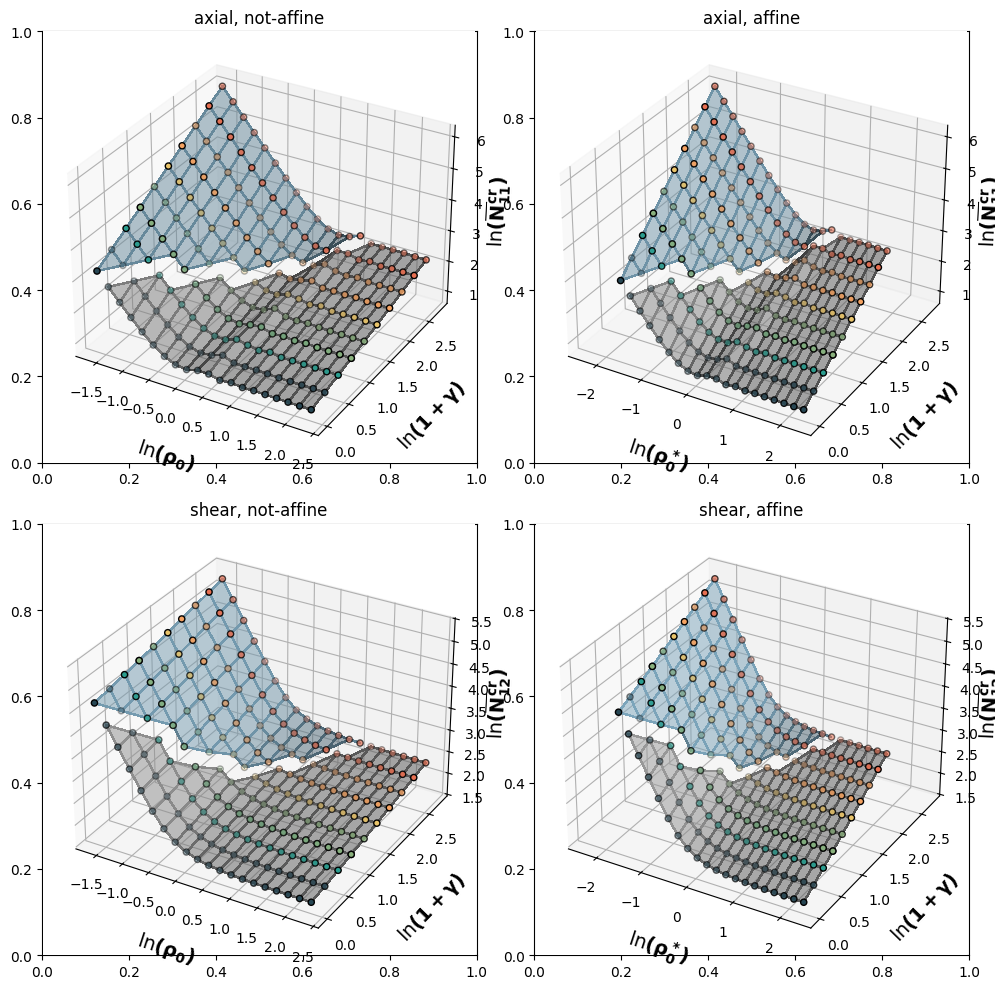

In [ ]:
# plot the stiffened panel kernel data
# for jupyter notebook
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
matplotlib.use("module://matplotlib_inline.backend_inline")
# %matplotlib notebook  # Use interactive mode in Jupyter

import sys
import matplotlib.pyplot as plt
# from mpl_toolkits import mplot3d
import numpy as np

sys.path.append("src/")
from closed_form_dataset import get_closed_form_data
from plot_utils import plot_surface


# case 1 : rho0, gamma
# --------------------------
n_rho0 = 20
n_gamma = 10
n_xi = 5
shear_ks_param = None # 1.0
# axial = True
# affine_transform = True
log_transform = True
var_exclude_ind = 2 # exclude xi, just shows (rho0, gamma) => buckling load here

# 2x2 subplots
multiplot = True
if multiplot:
    figsize = (10,10) #(10,10) #(15, 15)
    fig, _ax = plt.subplots(2, 2, figsize=figsize)

ct = -1
for axial in [True, False]:
    for affine_transform in [False, True]:

        ct += 1
    
        if not(multiplot):
            fig = plt.figure()
            ax = fig.add_subplot(111, projection='3d', computed_zorder=False)

        if multiplot:
            ax = _ax[ct // 2, ct % 2]
            ax = fig.add_subplot(2, 2, ct+1, projection='3d', computed_zorder=False)

        # X - (rho0, gamma, xi) and Y - (Nbar_cr)
        #   get interp zone data
        X_interp, Y_interp = get_closed_form_data(
            axial=axial, include_extrapolation=True, 
            affine_transform=affine_transform, 
            log_transform=log_transform,
            nan_extrapolation=True, # for leaving out in plot
            nan_interpolation=False,
            shear_ks_param=shear_ks_param,
            n_rho0=n_rho0, n_gamma=n_gamma, n_xi=n_xi,
        )



        # plot interpolation
        plot_surface(X_interp, Y_interp, 
                    surf_color_map="gray",
                    var_exclude_ind=var_exclude_ind, 
                    nx1=n_rho0, nx2=n_gamma if var_exclude_ind == 2 else n_xi,
                    var_exclude_range=[0.3]*2 if var_exclude_ind == 2 else [0.0]*2,
                    ax=ax, show=False)

        #   get extrap zone data
        X_extrap, Y_extrap = get_closed_form_data(
            axial=axial, include_extrapolation=True, 
            affine_transform=affine_transform,
            log_transform=log_transform,
            nan_extrapolation=False, # for leaving out in plot
            nan_interpolation=True,
            shear_ks_param=shear_ks_param,
            n_rho0=n_rho0, n_gamma=n_gamma, n_xi=n_xi,
        )

        # plot extrap data
        plot_surface(X_extrap, Y_extrap, 
                    surf_color_map="blue",
                    var_exclude_ind=var_exclude_ind, 
                    nx1=n_rho0, nx2=n_gamma if var_exclude_ind == 2 else n_xi,
                    var_exclude_range=[0.3]*2 if var_exclude_ind == 2 else [0.0]*2,
                    ax=ax, show=False)
        
        fs = 14
        fw = 'bold'
        lp = 10
        load_str = "axial" if axial else "shear"
        affine_str = "affine" if affine_transform else "not-affine"
        plt.title(f"{load_str}, {affine_str}")
        ax.set_xlabel(r"$\mathbf{\ln(\rho_0^*)}$" if affine_transform else r"$\mathbf{\ln(\rho_0)}$", fontsize=fs, fontweight=fw, labelpad=lp)
        ax.set_ylabel(r"$\mathbf{\ln(1+\gamma)}$", fontsize=fs, fontweight=fw, labelpad=lp)
        ax.set_zlabel(r"$\mathbf{\ln(\overline{N}_{11}^{cr})}$" if axial else r"$\mathbf{\ln(\overline{N}_{12}^{cr})}$", fontsize=fs, fontweight=fw, labelpad=0)
        plt.tight_layout()
        # ax.view_init(elev=20, azim=30)  # Adjust elevation and azimuth
        if not(multiplot): plt.show()
        # plt.close('all')

if multiplot: plt.show()


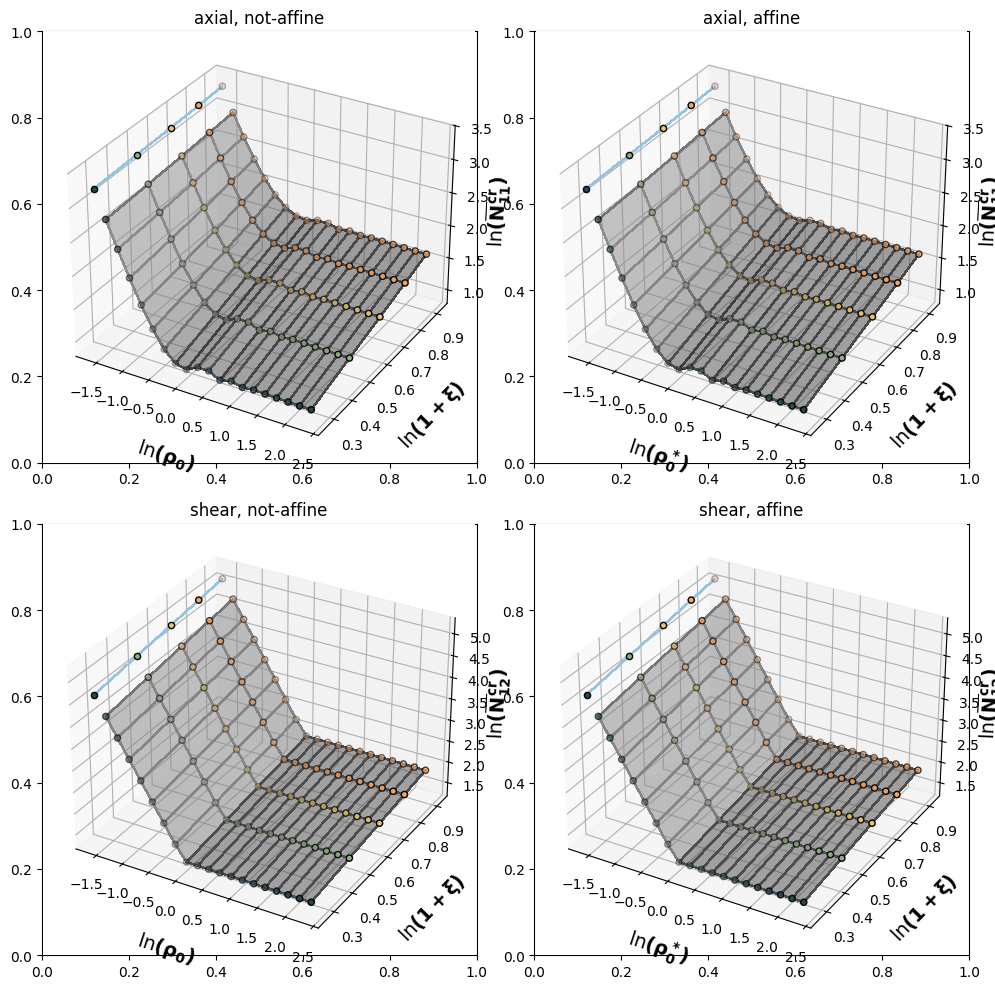

In [2]:
# case 2 : rho0, xi
# --------------------------
n_rho0 = 20
n_gamma = 10
n_xi = 5
axial = True
affine_transform = True
log_transform = True
log_xi = True
var_exclude_ind = 1 # exclude xi, just shows (rho0, gamma) => buckling load here

# 2x2 subplots
multiplot = True
if multiplot:
    figsize = (10,10) #(10,10) #(15, 15)
    fig, _ax = plt.subplots(2, 2, figsize=figsize)

ct = -1
for axial in [True, False]:
    for affine_transform in [False, True]:

        ct += 1
    
        if not(multiplot):
            fig = plt.figure()
            ax = fig.add_subplot(111, projection='3d', computed_zorder=False)

        if multiplot:
            ax = _ax[ct // 2, ct % 2]
            ax = fig.add_subplot(2, 2, ct+1, projection='3d', computed_zorder=False)

        # X - (rho0, gamma, xi) and Y - (Nbar_cr)
        #   get interp zone data
        X_interp, Y_interp = get_closed_form_data(
            axial=axial, include_extrapolation=True, 
            affine_transform=affine_transform, 
            log_transform=log_transform,
            nan_extrapolation=True, # for leaving out in plot
            nan_interpolation=False,
            log_xi=log_xi,
            n_rho0=n_rho0, n_gamma=n_gamma, n_xi=n_xi,
        )



        # plot interpolation
        plot_surface(X_interp, Y_interp, 
                    surf_color_map="gray",
                    var_exclude_ind=var_exclude_ind, 
                    nx1=n_rho0, nx2=n_gamma if var_exclude_ind == 2 else n_xi,
                    var_exclude_range=[0.3]*2 if var_exclude_ind == 2 else [0.0]*2,
                    log_xi=log_xi,
                    ax=ax, show=False)

        #   get extrap zone data
        X_extrap, Y_extrap = get_closed_form_data(
            axial=axial, include_extrapolation=True, 
            affine_transform=affine_transform,
            log_transform=log_transform,
            nan_extrapolation=False, # for leaving out in plot
            nan_interpolation=True,
            log_xi=log_xi,
            n_rho0=n_rho0, n_gamma=n_gamma, n_xi=n_xi,
        )

        # plot extrap data
        plot_surface(X_extrap, Y_extrap, 
                    surf_color_map="blue",
                    var_exclude_ind=var_exclude_ind, 
                    nx1=n_rho0, nx2=n_gamma if var_exclude_ind == 2 else n_xi,
                    var_exclude_range=[0.3]*2 if var_exclude_ind == 2 else [0.0]*2,
                    log_xi=log_xi,
                    ax=ax, show=False)
        
        fs = 14
        fw = 'bold'
        lp = 10
        load_str = "axial" if axial else "shear"
        affine_str = "affine" if affine_transform else "not-affine"
        plt.title(f"{load_str}, {affine_str}")
        ax.set_xlabel(r"$\mathbf{\ln(\rho_0^*)}$" if affine_transform else r"$\mathbf{\ln(\rho_0)}$", fontsize=fs, fontweight=fw, labelpad=lp)
        ax.set_ylabel(r"$\mathbf{\ln(1+\xi)}$" if log_xi else r"$\mathbf{\xi}$", fontsize=fs, fontweight=fw, labelpad=lp)
        ax.set_zlabel(r"$\mathbf{\ln(\overline{N}_{11}^{cr})}$" if axial else r"$\mathbf{\ln(\overline{N}_{12}^{cr})}$", fontsize=fs, fontweight=fw, labelpad=0)
        plt.tight_layout()
        # ax.view_init(elev=20, azim=30)  # Adjust elevation and azimuth
        if not(multiplot): plt.show()
        # plt.close('all')

if multiplot: plt.show()